# Month/Season Analysis

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_palette("mako")

#import sqlite3
#conn = sqlite3.connect(‘.db’)
#cursor = conn.cursor()

In [44]:
df = pd.read_csv('final_df.csv')

#drop dupes
df.drop_duplicates(subset = 'title', keep = 'first', inplace = True)

In [45]:
#initial
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 8376
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5698 non-null   int64  
 1   title              5698 non-null   object 
 2   runtime            2000 non-null   float64
 3   primary_name       2143 non-null   object 
 4   popularity         1924 non-null   float64
 5   vote_average       1924 non-null   float64
 6   vote_count         1924 non-null   float64
 7   production_budget  5698 non-null   float64
 8   worldwide_gross    5698 non-null   float64
 9   month              5698 non-null   float64
 10  domestic_gross     5698 non-null   float64
 11  roi                5698 non-null   float64
 12  genre              2132 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 623.2+ KB


In [72]:
#create subset
month = df[['title', 'roi','month']]

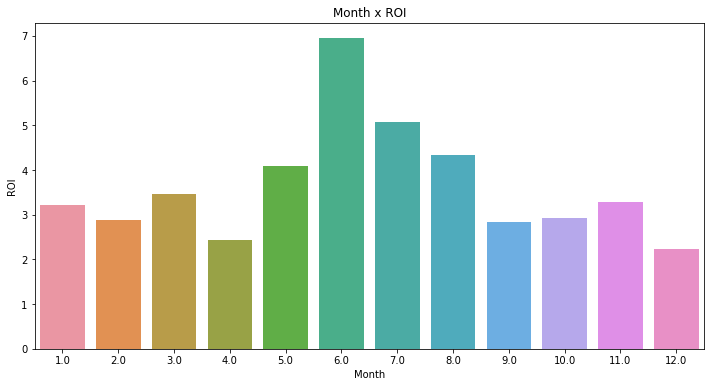

In [73]:
sns.set_palette("mako")

mako = sns.color_palette("mako")

#plot
plt.figure(figsize=(12, 6))

with sns.color_palette(mako):
    sns.barplot(x='month', y='roi', data=month, ci=None)
    
plt.title('Month x ROI')
plt.xlabel('Month')
plt.ylabel('ROI');

In [74]:
# catogorize month into season

def season(month):
    if 3.0 <= month <= 5.0:
        return "Spring"
    elif 6.0 <= month <= 8.0:
        return "Summer"
    elif 9.0 <= month <= 11.0:
        return "Autumn"
    else:
        return "Winter"

In [75]:
# apply and create new column
month['season'] = month['month'].apply(season)

month.head()

<ipython-input-75-c862b0774fed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['season'] = month['month'].apply(season)


,title,roi,month,season
0,Foodfight!,-0.998362,12.0,Winter
1,Mortal Kombat,5.106661,8.0,Summer
2,The Overnight,4.829980,6.0,Summer
4,On the Road,-0.627468,3.0,Spring
10,The Secret Life of Walter Mitty,1.064409,12.0,Winter


In [85]:
#create month for anova
month_map = {
    1.0: 'January',
    2.0: 'February',
    3.0: 'March',
    4.0: 'April',
    5.0: 'May',
    6.0: 'June',
    7.0: 'July',
    8.0: 'August',
    9.0: 'September',
    10.0: 'October',
    11.0: 'November',
    12.0: 'December'
}

In [89]:
month['official_month'] = month['month'].map(month_map)

<ipython-input-89-a53ae3941abf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['official_month'] = month['month'].map(month_map)


,title,roi,month,season,official_month
0,Foodfight!,-0.998362,12.0,Winter,December
1,Mortal Kombat,5.106661,8.0,Summer,August
2,The Overnight,4.829980,6.0,Summer,June
4,On the Road,-0.627468,3.0,Spring,March
10,The Secret Life of Walter Mitty,1.064409,12.0,Winter,December
...,...,...,...,...,...
8372,The Mongol King,-0.871429,12.0,Winter,December
8373,Following,39.082500,4.0,Spring,April
8374,Return to the Land of Wonders,-0.732400,7.0,Summer,July
8375,A Plague So Pleasant,-1.000000,9.0,Autumn,September


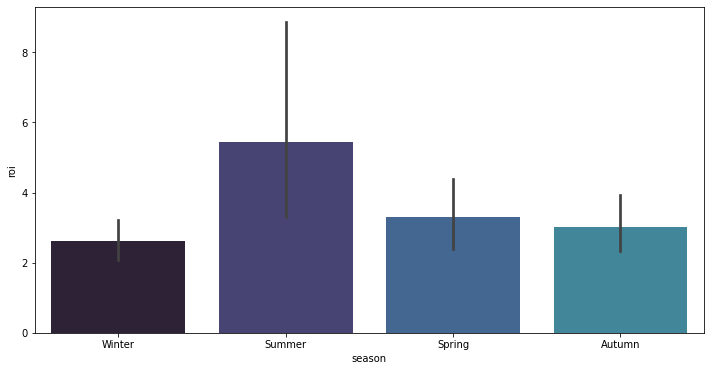

In [50]:
#plot
plt.figure(figsize = (12,6))
sns.barplot(x = 'season', y = 'roi', data = month);

In [76]:
#I'm an idiot

In [58]:
roi = month['roi']
month_col = month['month']
szn = month['season']

In [82]:
#anova

categories = [group['roi'] for name, group in month.groupby('season')]
f_stat, pval = stats.f_oneway(*categories)

In [84]:
alpha = 0.05 
print(pval)
if pval < alpha:
    print("statistically significant")
else:
    print("not statistically significant")

0.047805058866785696
statistically significant


In [ ]:
#test for significance in roi and month 

In [90]:
#anova

cat2 = [group['roi'] for name, group in month.groupby('official_month')]
f_stat, pval = stats.f_oneway(*cat2)

In [91]:
alpha = 0.05 
print(pval)
if pval < alpha:
    print("statistically significant")
else:
    print("not statistically significant")

0.44279897612583313
not statistically significant
